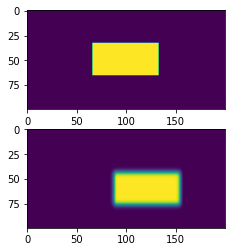

In [2]:
#A code from Vasily Golubev
from matplotlib import pyplot as plt
import numpy as np
import sys

'''
	Scheme of simulation domain
	^ Y
	|
	---------------------------
	|                         |
	|                         |
	|                         |
	|                         |
	|                         |
	|                         |
	|                         |
	----------------------------> X
	(0,0)
'''

# Courant condition: max{cx, cy} * dt < min{dx, dy}

u0 = 1 # initial u value
time = 0.015 # Total time in seconds
dt = 0.0006 # Time step in seconds
nt = int(time / dt) # Amount of time steps
lx = 200 # Length along X in meters
ly = 100 # Length along Y in meters
dx = 1 # Spatial step along X in meters
dy = 1 # Spatial step along Y in meters
nx = int(lx / dx) # Number of nodes along X
ny = int(ly / dy) # Number of nodes along Y

# equation: du/dt + cx * du/dx + cy * du/dy = 0
# node = [u]

data_curr = [[0] * nx for _ in range(ny)] # n-th time layer data
data_next = [[0] * nx for _ in range(ny)] # (n+1)-th time layer data

# with possible extension to the mat(x,y) dependency
mat = {'cx': 1450, 'cy': 700} # equation parameters

def clean_data():
	for j in range(0, ny):
		for i in range(0, nx):
			data_curr[j][i] = 0;

def apply_initial_data():
	for j in range(int(ny/3), int(ny/3 * 2)):
		for i in range(int(nx/3), int(nx/3 * 2)):
			data_curr[j][i] = u0;

def save_data():
	x = np.arange(0, lx, dx)
	y = np.arange(0, ly, dy)
	# X, Y = np.meshgrid(x - [lx / 2] * len(x), y - [ly / 2] * len(y)) # for test function
	# Z = np.exp(-X**2 / 100 - Y**2 / 100) # for test function
	X, Y = np.meshgrid(x, y)
	Z = np.array(data_curr)
	_, ax = plt.subplots(2, 1)
	ax[1].imshow(Z)
	# FIXME remove it, break calculations
	clean_data()
	apply_initial_data()
	Z = np.array(data_curr)
	ax[0].imshow(Z)
	plt.show()

if __name__ == '__main__':
	# initial conditions
	apply_initial_data()
	# save_data() # test visualization
	# sys.exit(0) # test visualization

	# main time loop
	for n in range(nt):
		# stepX
		for j in range(1, ny - 1): # Don't think much about boundaries
			for i in range(1, nx - 1):
				data_next[j][i] = data_curr[j][i] - mat['cx'] * (data_curr[j][i] - data_curr[j][i-1]) / dx * dt
		# update time layer
		for j in range(1, ny - 1): # Don't think much about boundaries
			for i in range(1, nx - 1):
				data_curr[j][i] = data_next[j][i]
		# stepY
		for i in range(1, nx - 1): # Don't think much about boundaries
			for j in range(1, ny - 1):
				data_next[j][i] = data_curr[j][i] - mat['cy'] * (data_curr[j][i] - data_curr[j-1][i]) / dy * dt
		# update time layer
		for j in range(1, ny - 1): # Don't think much about boundaries
			for i in range(1, nx - 1):
				data_curr[j][i] = data_next[j][i]
	# save results
	save_data();